In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) =  reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [14]:
##编码数据
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
## 使用onehot编码，分类一般使用此编码

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [16]:
## 可以用内置方法来替代上面的操作
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [21]:
## 构建网络
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [22]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [23]:
x_val = x_train[:1000]
partial_x_train = x_tarin[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train =  one_hot_train_labels[1000:]

In [24]:
#训练模型
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 119us/step - loss: 2.6099 - acc: 0.5288 - val_loss: 1.6775 - val_acc: 0.6340
Epoch 2/20
7982/7982 [==============================] - 0s 42us/step - loss: 1.3992 - acc: 0.7040 - val_loss: 1.2826 - val_acc: 0.7150
Epoch 3/20
7982/7982 [==============================] - 0s 42us/step - loss: 1.0559 - acc: 0.7672 - val_loss: 1.1189 - val_acc: 0.7530
Epoch 4/20
7982/7982 [==============================] - 0s 42us/step - loss: 0.8298 - acc: 0.8210 - val_loss: 1.0189 - val_acc: 0.7900
Epoch 5/20
7982/7982 [==============================] - 0s 42us/step - loss: 0.6640 - acc: 0.8612 - val_loss: 0.9661 - val_acc: 0.8000
Epoch 6/20
7982/7982 [==============================] - 0s 42us/step - loss: 0.5305 - acc: 0.8920 - val_loss: 0.9186 - val_acc: 0.8160
Epoch 7/20
7982/7982 [==============================] - 0s 42us/step - loss: 0.4294 - acc: 0.9108 - val_loss: 0.9172 - val_acc: 0.8100
Epoch 

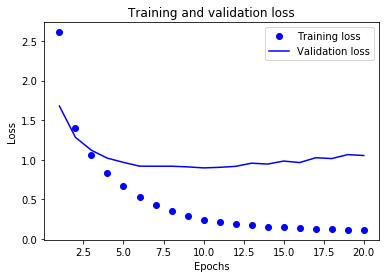

In [26]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

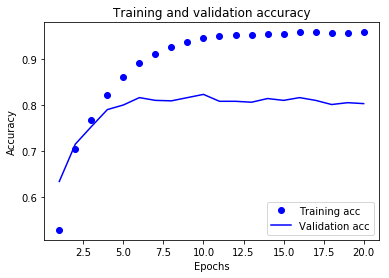

In [27]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 0s 58us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 0s 42us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 0s 42us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 0s 41us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 0s 42us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 0s 42us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 0s 41us/step - loss: 0.4124 - acc: 0.9139 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8/9
7982

In [29]:
results

[1.0227516693189966, 0.7756010686194165]

In [30]:
predictions = model.predict(x_test)

In [32]:
predictions[0].shape

(46,)

In [33]:
np.sum(predictions[0])

0.99999976

In [34]:
np.argmax(predictions[0])

3